In [1]:
from matplotlib import pyplot, cm
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# Parameters
nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

l1_target = 1e-6 # difference between successive iterations

In [3]:
def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [4]:
def poisson(psi, omega, dx, dy, l1_target):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    psi : 2D array of floats
        Initial guess
    omega : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l1_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    psi: 2D array of float
    omega: 2D array of float 
        Distribution after relaxation
    '''

    
    l1_norm = 1
    
    while l1_norm > l1_target:
        psid = psi.copy()
        omegan = omega.copy()
        psi[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                        ((psid[1:-1,2:]+psid[1:-1,:-2])*dy**2 +\
                        (psid[2:,1:-1] + psid[:-2,1:-1])*dx**2 +\
                         omegan[1:-1,1:-1]*dx**2*dy**2)
              
        omega[1:-1,1:-1] = .25 * (omegan[1:-1,2:] + omegan[1:-1, :-2] \
                              + omegan[2:, 1:-1] + omegan[:-2, 1:-1]) 
        
        # BCs are automatically enforced:top, bottom, right, left sides
        u_j = 1
        omega[-1,1:-1] = -1/2/dy**2 * (8* psi[-2,1:-1]-psi[-3,1:-1]) -\
                            3*u_j/dy
        omega[0,1:-1] = -1/2/dy**2 * (8* psi[1,1:-1]-psi[2,1:-1])    
        omega[1:-1,-1] = -1/2/dx**2 * (8* psi[1:-1,-2]-psi[1:-1,-3])
        omega[1:-1,0] = -1/2/dx**2 * (8* psi[1:-1,1]-psi[1:-1,2])
        
        t1 = L1norm(psi, psid)
        t2 = L1norm(omega, omegan)
        l1_norm = max(t1, t2)
    return psi, omega

In [5]:
# Mesh
x = numpy.linspace(0,1,nx)
y = numpy.linspace(0,1,ny)
X,Y = numpy.meshgrid(x,y)

# initialize
psi = numpy.zeros((ny,nx))
omega = numpy.zeros((ny,nx))

In [6]:
a = poisson(psi, omega, dx, dy, l1_target)
b = a[0] # derive psi

# maximum value of psi
b_max = numpy.max(numpy.abs(b))
b_max

0.099845172462224338

In [7]:
c = a[1] # derive omega

# maximum value of omega
d_max = numpy.max(numpy.abs(c))
d_max

78.192661228600699

In [8]:
numpy.round(psi[32,::8], 4)

array([ 0.    , -0.0575, -0.0944, -0.0944, -0.0575,  0.    ])

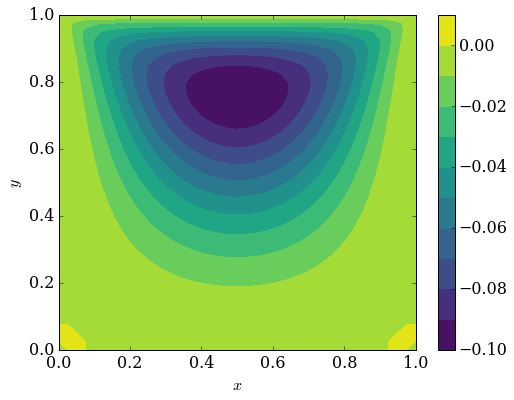

In [9]:
pyplot.figure(figsize=(8,6))
pyplot.contourf(X, Y, b, 12, cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();